In [70]:
import numpy as np
from scipy import ndimage
import cv2
import skimage

def make_connected_components_convex(mask):
    # Convert the input mask to a NumPy array with 8-bit unsigned data type
    mask_np = np.array(mask, dtype=np.uint8)

    # Label connected components
    num_labels, labeled_mask = cv2.connectedComponents(mask_np, connectivity=8, ltype=cv2.CV_32S)

    convex_mask = np.zeros_like(mask_np, dtype=np.uint8)

    # Iterate over each connected component
    for label in range(1, num_labels):
        # Create a binary mask for the current connected component
        component_mask = np.where(labeled_mask == label, 1, 0).astype(np.uint8)
                
        contours, _ = cv2.findContours(component_mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
        
        # If the component has contours, make the filled convex hull
        for i in contours:
            convex_hull = cv2.convexHull(i, clockwise = True)

            # Draw the filled convex hull on the mask
            cv2.drawContours(convex_mask, [convex_hull], -1, 1, thickness=cv2.FILLED)

            # Update the original mask with the filled convex hull
            mask_np = np.where(convex_mask == 1, 1, mask_np)

    return mask_np

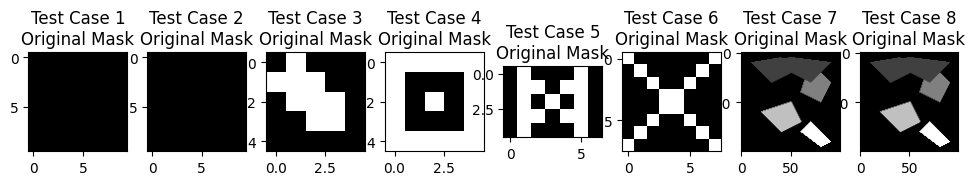

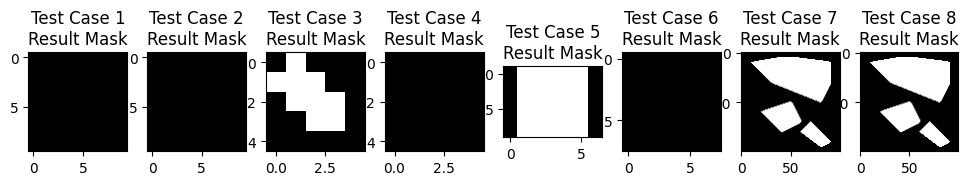

In [82]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

test_cases = [
    np.zeros((10, 10), dtype=np.uint8),
    np.ones((10, 10), dtype=np.uint8),
    np.array([[0, 1, 0, 0, 0],
              [1, 1, 1, 0, 0],
              [0, 1, 1, 1, 0],
              [0, 0, 1, 1, 0],
              [0, 0, 0, 0, 0]], dtype=np.uint8),
        np.array([[1, 1, 1, 1, 1],
              [1, 0, 0, 0, 1],
              [1, 0, 1, 0, 1],
              [1, 0, 0, 0, 1],
              [1, 1, 1, 1, 1]], dtype=np.uint8),
    
    np.array([[0, 1, 0, 0, 0, 1, 0],
              [0, 1, 1, 0, 1, 1, 0],
              [0, 1, 0, 1, 0, 1, 0],
              [0, 1, 1, 0, 1, 1, 0],
              [0, 1, 0, 0, 0, 1, 0]], dtype=np.uint8),
    
    np.array([[1, 0, 0, 0, 0, 0, 0, 1],
              [0, 1, 0, 0, 0, 0, 1, 0],
              [0, 0, 1, 0, 0, 1, 0, 0],
              [0, 0, 0, 1, 1, 0, 0, 0],
              [0, 0, 0, 1, 1, 0, 0, 0],
              [0, 0, 1, 0, 0, 1, 0, 0],
              [0, 1, 0, 0, 0, 0, 1, 0],
              [1, 0, 0, 0, 0, 0, 0, 1]], dtype=np.uint8)
]

# Create a non-convex polygon
points = np.array([[10, 10], [30, 30], [50, 20], [70, 30], [90, 10], [50, 5]], dtype=np.int32)
cv2.fillPoly(image, [points], color=1)
test_cases.append(image)
test_cases.append(image * 2)

# Plot original and result masks for each test case
plt.figure(figsize=(12, 4))

for i, test_case in enumerate(test_cases, 1):
    plt.subplot(1, len(test_cases), i)
    plt.imshow(test_case, cmap='gray')
    plt.title(f"Test Case {i}\nOriginal Mask")
plt.show()

plt.figure(figsize=(12, 4))

for i, test_case in enumerate(test_cases, 1):
    result_mask = make_connected_components_convex(test_case)
    
    plt.subplot(1, len(test_cases), i)
    plt.imshow(result_mask, cmap='gray')
    plt.title(f"Test Case {i}\nResult Mask")
plt.show()

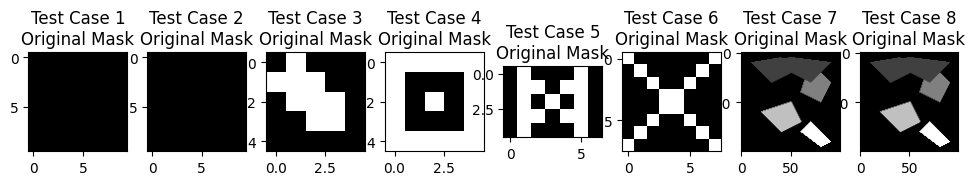

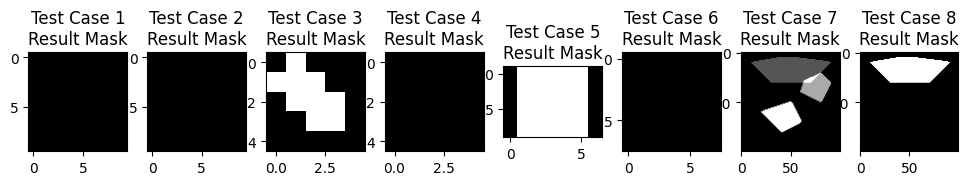

In [80]:
def convex(image):
    '''[0,1 ,2,3] numpy array -> convex'''
    return np.minimum(make_connected_components_convex(np.where(image == 1, 1, 0)) + make_connected_components_convex(np.where(image == 2, 1, 0)) * 2 +
                      make_connected_components_convex(np.where(image == 3, 1, 0)) * 3, 3 * np.ones_like(image))
    
# Plot original and result masks for each test case
plt.figure(figsize=(12, 4))

for i, test_case in enumerate(test_cases, 1):
    plt.subplot(1, len(test_cases), i)
    plt.imshow(test_case, cmap='gray')
    plt.title(f"Test Case {i}\nOriginal Mask")

plt.show()

plt.figure(figsize=(12, 4))

for i, test_case in enumerate(test_cases, 1):
    result_mask = convex(test_case)
    
    plt.subplot(1, len(test_cases), i)
    plt.imshow(result_mask, cmap='gray')
    plt.title(f"Test Case {i}\nResult Mask")

plt.show()